# 1. Introducere

---

Recunoașterea emoțiilor se face pe baza unor modificări ale feței umane, pe care le numim ca regiuni de interes, cum ar fi ochii, sprâncenele, fruntea, obrajii, gura. Aceste aplicatii sunt des utilizate in domeniile de divertisment, supraveghere, psihologie, marketing. Problema tratata consta în recunoașterea expresiei faciale pe baza setului de date in scopul localizarii și înțelegerii în mod eficient a regiunilor faciale de interes pentru a prezice emotia persoanei.


# 2. Literatura de specialitate

---

La baza cercetarii si detectării emoțiilor, regasim domenii ca machine learning, natural  language,  neuroscience. Acestea se axau pe colectarea si analiza de date ale expresiilor faciale, caracteristicilor vocii și datele textuale ca indicator universal al emoțiilor. Computer Vision (CV) este unul dintre domeniile de studiu în învățare automată, care ajută computerul să studieze folosind diferite tehnici și metode, astfel încât să poată observa și surprinde ceea ce există într-o imagine. În domeniul clasificării imaginilor, rețelele neuronale convoluționale (CNN) sunt printre cei mai folosiți algoritmi unde toți neuronii sunt conectați între ei. Prin urmare, este un algoritm care preia o imagine ca intrare și atribuie ponderi diferitelor aspecte ale imagine.


In [ ]:
import os
import pandas as pd

# 3. Import Data from Google Drive

---

Au fost selectate 2000 de date pentru antrenare si 600 de date pentru test, acestea incluzand a cate 4 tipuri de emotii, Happy, Sad, Surprize si Angry, fiecare avand cate 500 respectiv 200 date pe emotie.



In [ ]:
TRAIN_DIR = '/content/drive/MyDrive/train/'
TEST_DIR = '/content/drive/MyDrive/test/'

In [ ]:
# Get the dataset 

def load_dataset(directory):
  image_paths = []
  labels = []

  for label in os.listdir(directory):
    for filename in os.listdir(directory + label):
      image_path = os.path.join(directory, label, filename)
      image_paths.append(image_path)
      labels.append(label)

    print(label, 'Completed')
    
  return image_paths, labels

> **Train Data**


---




In [ ]:
# Convert to DataFrame

train = pd.DataFrame()
train['image'], train['label'] = load_dataset(TRAIN_DIR)

# Shuffle the dataset for testing the samples

train = train.sample(frac=1).reset_index(drop=True)
train.head()

surprise Completed
sad Completed
happy Completed
angry Completed


,image,label
0,/content/drive/MyDrive/train/sad/Training_9326...,sad
1,/content/drive/MyDrive/train/sad/Training_9793...,sad
2,/content/drive/MyDrive/train/angry/Training_92...,angry
3,/content/drive/MyDrive/train/sad/Training_9445...,sad
4,/content/drive/MyDrive/train/surprise/Training...,surprise


> **Test Data**


---



In [ ]:
# Convert to DataFrame

test = pd.DataFrame()
test['image'], test['label'] = load_dataset(TEST_DIR)
test.head()

surprise Completed
sad Completed
happy Completed
angry Completed


,image,label
0,/content/drive/MyDrive/test/surprise/PublicTes...,surprise
1,/content/drive/MyDrive/test/surprise/PublicTes...,surprise
2,/content/drive/MyDrive/test/surprise/PublicTes...,surprise
3,/content/drive/MyDrive/test/surprise/PublicTes...,surprise
4,/content/drive/MyDrive/test/surprise/PublicTes...,surprise


> **Vizualizare imagini**


---


In [ ]:
import matplotlib.pyplot as plt
from keras_preprocessing.image import load_img
from tqdm.notebook import tqdm
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
import numpy as np
from PIL import Image
import cv2 

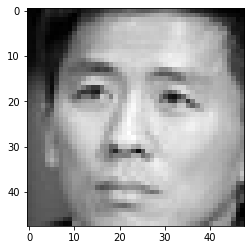

In [ ]:
# Testing sample

img_sample = Image.open(train['image'][1])
plt.imshow(img_sample, cmap='gray');

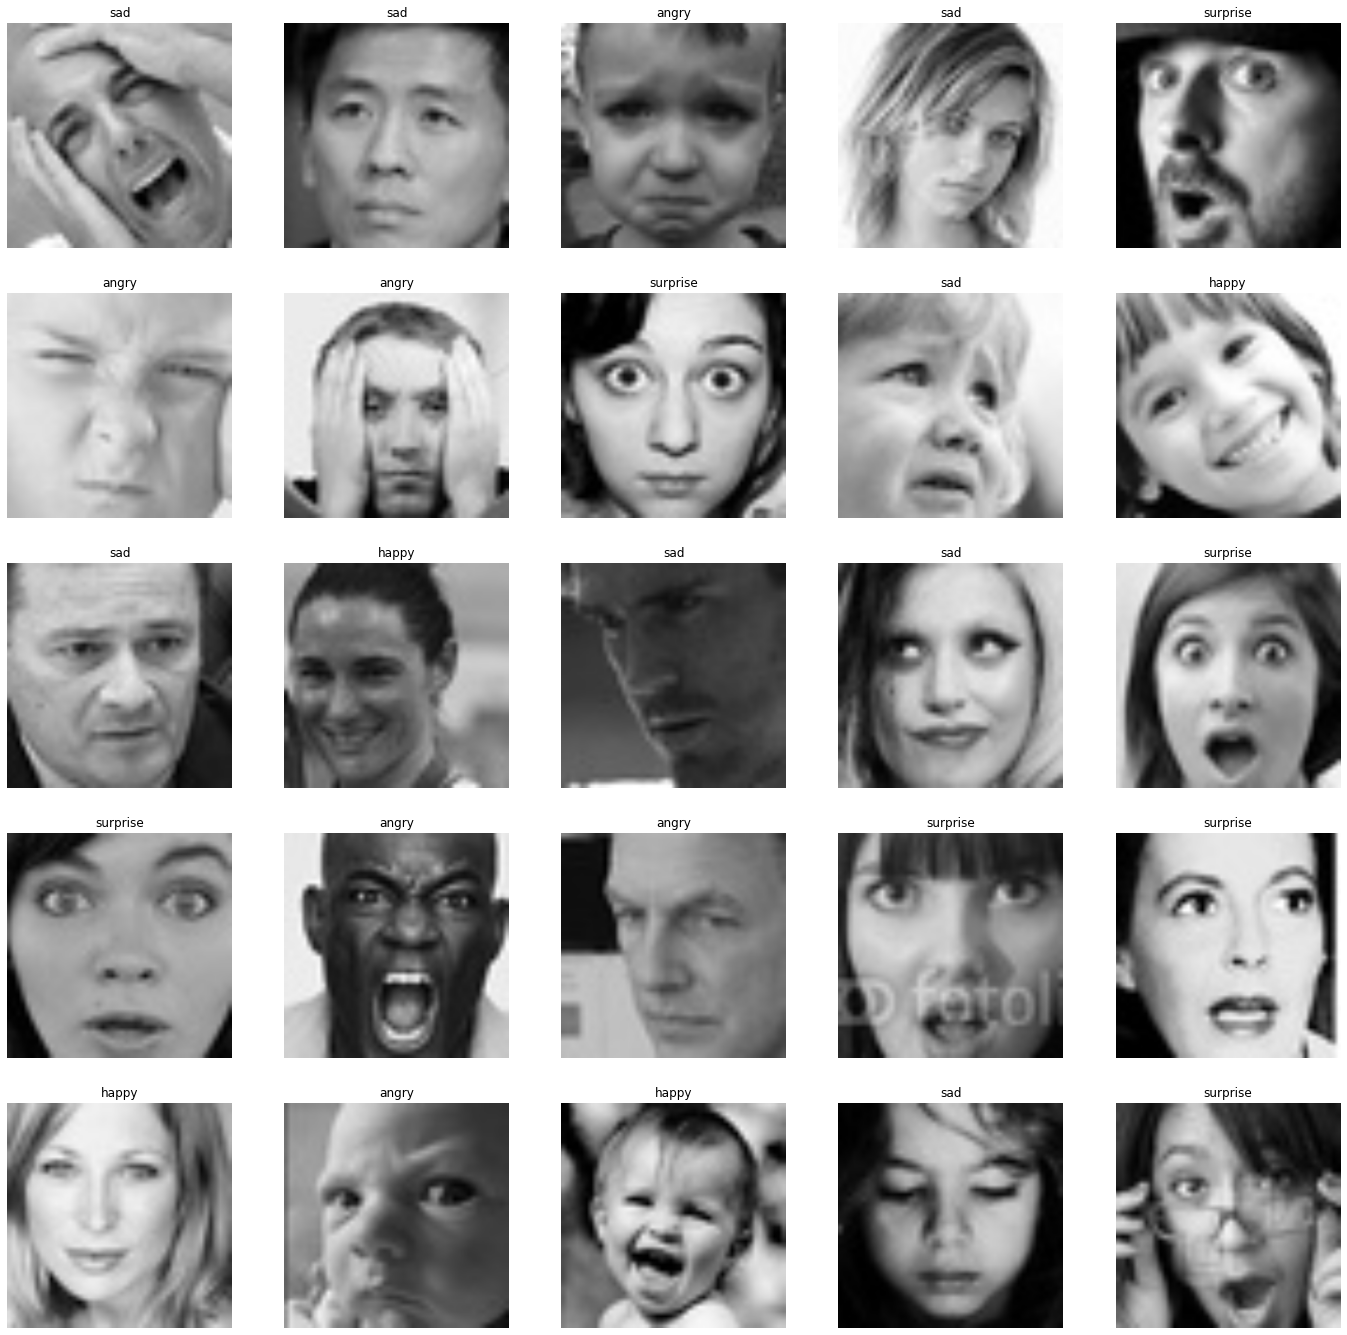

In [ ]:
# Grid of images

plt.figure(figsize=(24,24))
files = train.iloc[0:25] # 25 images
img_size = 300

# Display the grid

for index, file, label in files.itertuples():
  plt.subplot(5, 5, index+1)
  img = load_img(file)
  img = np.array(img)
  img = cv2.resize(img, (img_size, img_size))
  plt.imshow(img)
  plt.title(label)
  plt.axis('off')

In [ ]:
# Extract all the images from the files

def extract_features(images):
  features = []

  # tqdm will display the processing of the images

  for image in tqdm(images):
    img = load_img(image, color_mode = "grayscale")
    img = np.array(img)
    features.append(img)

  # Using array for the images and reshape

  features = np.array(features)
  features = features.reshape(len(features), 48, 48, 1) # Width and height is 48, 1 dimension

  return features


In [ ]:
train_features = extract_features(train['image'])

  0%|          | 0/2000 [00:00<?, ?it/s]

In [ ]:
test_features = extract_features(test['image'])

  0%|          | 0/600 [00:00<?, ?it/s]

In [ ]:
# Normalize the images

x_train = train_features/255.0
x_test = test_features/255.0

In [ ]:
# Convert label to integer using LabelEncoder

le = LabelEncoder()
le.fit(train['label'])

y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [ ]:
# Category with 4 classes

y_train = to_categorical(y_train, 4)
y_test = to_categorical(y_test, 4)

In [ ]:
# Config

input_shape = (48, 48, 1)
output_class = 4

# 4. Constuirea modelului

---

Rețelele sunt programate folosind biblioteca Keras si modelul de secvență pentru învățarea automată. Rețeaua începe cu un strat de intrare care se concentrează pe producerea de mai multă acuratețe și mai puține pierderi la sfârșitul rezultatului. Modelul conține 4 straturi de Convoluție cu 128, 256, 512 de filtre fiecare cu dimensiunea de 3,3 urmat de un strat de MaxPooling si 
Dropout de 0,4 pentru a reduce overfittingul iar funcția de activare folosită este „ReLu”. Utilizarea metodei Flatten pentru a se putea mapa pe straturile dense, folosindu-se 512 neuroni si trecerea in 256 iar outputul fiind de 4 pentru fiecare emotie selectata, functia fiind softmax.

---

Antrenăm modelul la 100 de epoci pentru a obține mai multă acuratețe, utilizand si Adam Optimizer pentru a obtine modelul cat mai precis, iar antrenarea a datelor se efectueaza in clase de 128 (batch)



In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential([
    # Convolutia 1
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),
    
    # Convolutia 2
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),

    # Convolutia 3
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),

    # Convolutia 4
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),

    # Apelarea Flatten pentru a se putea mapa pe straturile dense
    tf.keras.layers.Flatten(),

    # strat ascuns cu 512 neuroni trecere in 256
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),

    # Stratul de output va fi 4 pentru happy, sad...
    tf.keras.layers.Dense(output_class, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 128)       1280      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 23, 23, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 256)       295168    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 256)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 10, 10, 256)       0

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

In [ ]:
# Train the Model

TrainModel = model.fit(x=x_train, y=y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
16/16 [==============================] - 102s 6s/step - loss: 1.3755 - accuracy: 0.2970 - val_loss: 1.3986 - val_accuracy: 0.2500
Epoch 2/100
16/16 [==============================] - 104s 7s/step - loss: 1.3929 - accuracy: 0.2540 - val_loss: 1.3882 - val_accuracy: 0.2500
Epoch 3/100
16/16 [==============================] - 103s 6s/step - loss: 1.3874 - accuracy: 0.2450 - val_loss: 1.3859 - val_accuracy: 0.2450
Epoch 4/100
16/16 [==============================] - 104s 7s/step - loss: 1.3845 - accuracy: 0.2515 - val_loss: 1.3802 - val_accuracy: 0.2867
Epoch 5/100
16/16 [==============================] - 104s 7s/step - loss: 1.3729 - accuracy: 0.3035 - val_loss: 1.3522 - val_accuracy: 0.3333
Epoch 6/100
16/16 [==============================] - 104s 6s/step - loss: 1.3708 - accuracy: 0.2900 - val_loss: 1.3708 - val_accuracy: 0.2900
Epoch 7/100
16/16 [==============================] - 103s 6s/step - loss: 1.3596 - accuracy: 0.3070 - val_loss: 1.3492 - val_accuracy: 0.3183
Epoch 

# 5. Rezultate

---

> **Image Test**


In [ ]:
import random

Original Output: happy
1/1 [==============================] - 0s 86ms/step
Predicted Output: happy


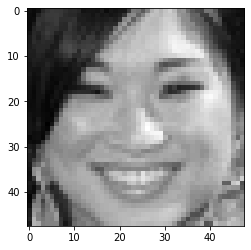

In [ ]:
# Original image selection

image_index = random.randint(0, len(test))
print('Original Output:', test['label'][image_index])

# Predict based on the model 

predict = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([predict.argmax()])[0]
print('Predicted Output:', prediction_label)

# Plot the result

plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

Original Output: surprise
1/1 [==============================] - 0s 117ms/step
Predicted Output: surprise


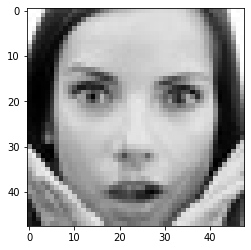

In [ ]:
# Original image selection

image_index = random.randint(0, len(test))
print('Original Output:', test['label'][image_index])

# Predict based on the model 

predict = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([predict.argmax()])[0]
print('Predicted Output:', prediction_label)

# Plot the result

plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

> **Performanta**


---



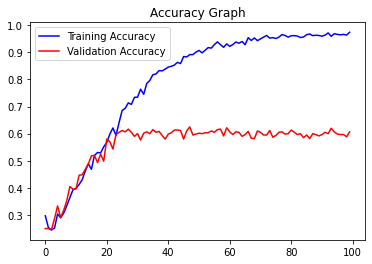

In [ ]:
# Accuracy

accuracy = TrainModel.history['accuracy']
val_accuracy = TrainModel.history['val_accuracy']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend();

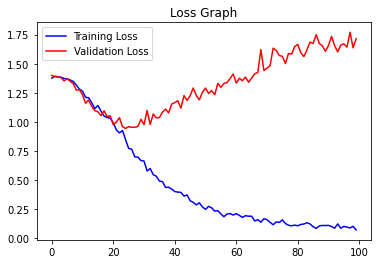

In [ ]:
# Loss

loss = TrainModel.history['loss']
val_loss = TrainModel.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend();

# 6. Concluzii

---

Modelul ajunge la o acuratete de 97%, insa valoarea acuratetii este de maxim 61%, de aceea unele imagini pot fi recunoscute si clasificate gresit. Observatia principala consta in faptul ca imaginile ce reprezinta o emotie foarte clara este usor detectata de model insa in cazul unor imagini greu de inteles emotia, modelul poate gresi, emotia fiind subiectiva. Potrivit graficului observam o diferentiere mare incepand cu epoch 20, validation accuracy fiind in maxim 61% pe cand training accuracy crescand consecutiv, aceeasi observatie fiind in cazul graficului cu loss.

# 7. Bibliografie

---

1. Divya, M. N. (2021). Smart Teaching Using Human Facial Emotion Recognition (Fer) Model. Turkish Journal of Computer and Mathematics Education (TURCOMAT), 12(11), 6925-6932.
2. Chiurco, A., Frangella, J., Longo, F., Nicoletti, L., Padovano, A., Solina, V., ... & Citraro, C. (2022). Real-time Detection of Worker’s Emotions for Advanced Human-Robot Interaction during Collaborative Tasks in Smart Factories. Procedia Computer Science, 200, 1875-1884.
3. Franzoni, V., Biondi, G., Perri, D., & Gervasi, O. (2020). Enhancing mouth-based emotion recognition using transfer learning. Sensors, 20(18), 5222.